# This demo shows how to do a general search for similar images

This demo is setup using python3

Follow up more information on product webpage: https://help.aliyun.com/document_detail/113827.html

In [115]:
#setup envionrmnet for python depedency if necessary
! pip3 install aliyun-python-sdk-imagesearch #--upgrade 
! pip3 install pillow #--upgrade 

# configure credential from environemnt setting

In [116]:
accessKeyId = os.environ.get('accessKeyId', 'not_set')
accessKeySecret = os.environ.get('accessKeySecret', 'not_set')
instanceName_Product = os.environ.get('instanceName_Product', 'not_set')
instanceName_General = os.environ.get('instanceName_General', 'not_set')

print(instanceName_Product, instanceName_General)

jhsimagesearchproduct1 jhsimagesearchgeneral1


# Setup supporting function

In [110]:
#from IPython.display 
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from IPython.display import display
from IPython.core.display import HTML 
import json
from pprint import pprint
import os
import time
#import md5
import hashlib
import os

from aliyunsdkcore.profile import region_provider
from aliyunsdkcore.client import AcsClient
import base64
import aliyunsdkimagesearch.request.v20190325.AddImageRequest as AddImageRequest
import aliyunsdkimagesearch.request.v20190325.DeleteImageRequest as DeleteImageRequest
import aliyunsdkimagesearch.request.v20190325.SearchImageRequest as SearchImageRequest




In [111]:
def image_preview(image_path, box, cate):
    #img1 = Image(filename = image_path, width=100, height=100)
    img1 = Image.open(image_path)
    if box is not None and box != '':
        draw = ImageDraw.Draw(img1)
        bb = box.split(",")
        x0 = float(bb[0])
        y0 = float(bb[2])
        x1 = float(bb[1])
        x2 = float(bb[3])
        draw.rectangle([(x0, y0), (x1, x2)], outline='red')
        if cate is not None and cate != "":
            draw.text((x0, y0), cate, fill="red")
    img = img1
    return img

In [122]:
import aliyunsdkimagesearch.request.v20190325.SearchImageRequest as SearchImageRequest

def image_search_category(instanceName, image_path):
    request = SearchImageRequest.SearchImageRequest()

    request.set_InstanceName(instanceName)
    with open(image_path, 'rb') as imgfile:
        encoded_pic_content = base64.b64encode(imgfile.read())
        request.set_PicContent(encoded_pic_content)
    response = requestClient.do_action_with_exception(request)
    r = json.loads(response)
    #pprint(r)
    return response

In [127]:
def my_imagesearch_product(instanceName, image_path):
    result = image_search_category(instanceName, image_path)
    r = json.loads(result)
    category_desc = ''
    for c in r['PicInfo']['AllCategories']:
        if r['PicInfo']['CategoryId'] == c['Id']:
            category_desc = c['Name']
    r['cate_desc'] = category_desc
    r['cate_id'] = r['PicInfo']['CategoryId']
    r['obj_region'] = r['PicInfo']['Region']
    #pprint(r)
    display(image_preview(image_path, r['obj_region'], r['cate_desc']))
    print(image_path, ' | found category_desc: ', r['cate_desc'], r['cate_id'], ' | found category_id: ', r['cate_id'], ' | found region: ',  r['obj_region'])
    return r

# demo

In [137]:
# import ali_config
product = "ImageSearch"
region =   'cn-shanghai' # , ap-southeast-1(sg)

domain = 'imagesearch.cn-shanghai.aliyuncs.com' # 
endpoint = 'imagesearch.cn-shanghai.aliyuncs.com' # 

region_provider.add_endpoint(product, region, domain)
client  = AcsClient(accessKeyId, accessKeySecret, region)
requestClient = client

image path: /Users/jhs/070_code/AlibabaCloud_ImageSearch_Demo_py2/image/1.jpg


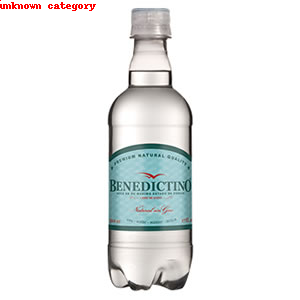

In [140]:
image_name = '1.jpg' # 'tower_rail_aluminum.jpg'
image_folder = './image' 
image_path = os.path.abspath(image_folder+'/'+image_name)

print("image path:", image_path)
img1 = image_preview(image_path, '0,0,0,0', 'unknown category')
img1

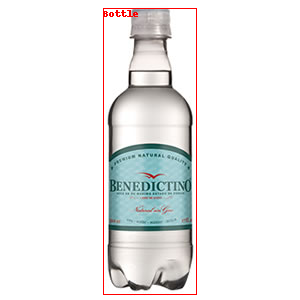

/Users/jhs/070_code/AlibabaCloud_ImageSearch_Demo_py2/image/1.jpg  | found category_desc:  Bottle 8  | found category_id:  8  | found region:  103,196,8,294


In [141]:
r = my_imagesearch_product(instanceName, image_path)

In [56]:
# test to upload a single image
instanceName = instanceName_Product
image_path = os.path.abspath(image_folder+'/'+image_name)
result = image_upload( instanceName, image_name, image_name, image_path)
print(image_path, result)

/Users/jhs/070_code/AlibabaCloud_ImageSearch_Demo_py2/image/1.jpg b'{"PicInfo":{"Region":"103,196,8,294","CategoryId":8},"Message":"success","RequestId":"411FED51-234D-4951-9DE4-9404C198E127","Success":true,"Code":0}'


In [147]:
def my_image_upload_display(instanceName, ProductId, image_name, image_path):
    result = image_upload(instanceName, ProductId, image_name, image_path)
    r = json.loads(result)
    pprint(r)
    category_desc = ''
    for c in r['PicInfo']['AllCategories']:
        if r['PicInfo']['CategoryId'] == c['Id']:
            category_desc = c['Name']
    r['cate_desc'] = category_desc
    r['cate_id'] = r['PicInfo']['CategoryId']
    r['obj_region'] = r['PicInfo']['Region']
    #pprint(r)
    display(image_preview(image_path, r['obj_region'], r['cate_desc']))
    print(image_path, ' | found category_desc: ', r['cate_desc'], r['cate_id'], ' | found category_id: ', r['cate_id'], ' | found region: ',  r['obj_region'])
    return r

In [177]:
# test to upload a list of image

import os
import time
from pprint import pprint


images = {}
for file in os.listdir(image_folder):
    if file.endswith(".jpg") or file.endswith(".png"):
        image_path = os.path.join(image_folder, file)
        # print(os.path.abspath(image_path))
        images[image_path] = file

pprint(images)

for image_path in images:
    image_name = images[image_path]
    result = image_upload(instanceName, image_name, image_name, image_path)
    print(instanceName,  image_name, image_path, result)
    time.sleep(1)

{'./image/1.jpg': '1.jpg',
 './image/HTB10Y5AXBr0gK0jSZFnq6zRRXXai.jpg_350x350.jpg': 'HTB10Y5AXBr0gK0jSZFnq6zRRXXai.jpg_350x350.jpg',
 './image/HTB19vore2WG3KVjSZPcq6zkbXXaZ.jpg_350x350.jpg': 'HTB19vore2WG3KVjSZPcq6zkbXXaZ.jpg_350x350.jpg',
 './image/HTB1QAdxdkxz61VjSZFrq6xeLFXaz.jpg_350x350.jpg': 'HTB1QAdxdkxz61VjSZFrq6xeLFXaz.jpg_350x350.jpg',
 './image/HTB1_8UmeYus3KVjSZKbq6xqkFXaq.jpg_350x350.jpg': 'HTB1_8UmeYus3KVjSZKbq6xqkFXaq.jpg_350x350.jpg',
 './image/HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg': 'HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg',
 './image/HTB1bb4re7WE3KVjSZSyq6xocXXaK.jpg_350x350.jpg': 'HTB1bb4re7WE3KVjSZSyq6xocXXaK.jpg_350x350.jpg',
 './image/HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg': 'HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg',
 './image/HTB1mPP7e.WF3KVjSZPhq6xclXXar.jpg_350x350.jpg': 'HTB1mPP7e.WF3KVjSZPhq6xclXXar.jpg_350x350.jpg',
 './image/HTB1oAi.eRWD3KVjSZFsq6AqkpXaQ.jpg_350x350.jpg': 'HTB1oAi.eRWD3KVjSZFsq6AqkpXaQ.jpg_350x350.jpg',
 './image/

In [180]:
def image_search_result_similarity(instanceName, image_path):
    r = my_imagesearch_product(instanceName, image_path)
    #r = json.loads(result)
    pprint(r)
    category_desc = ''
    for c in r['PicInfo']['AllCategories']:
        if r['PicInfo']['CategoryId'] == c['Id']:
            category_desc = c['Name']
    #pprint(r)
    
    #print(image_path, 'found category_desc: ', category_desc, r['PicInfo']['Category'], 'found category_id: ', r['PicInfo']['Category'], 'found region: ',  r['PicInfo']['Region'])
    
    #image_similar_name = r['Auctions'][1]['PicName']
    #image_similar_path = r['Auctions'][1]['CustomContent']
    image_similar_name = json.loads(r['Auctions'][1]['CustomContent'])['name']
    image_similar_path = json.loads(r['Auctions'][1]['CustomContent'])['path']
    image_similar_score = r['Auctions'][1]['SortExprValues']
    print("similar score: ", image_similar_score, "similar image: ", image_similar_path)
    
    #print(r['Auctions']['Auction'][1])
    
    img1 = image_preview(image_path, r['PicInfo']['Region'], category_desc)
    img2 = image_preview(image_similar_path, '', '')
    
    img_height = img1.size[1]
    if img1.size[1] < img2.size[1]:
        img_height = img2.size[1]
    img = Image.new('RGB', (img1.size[0]+img2.size[0]+40, img_height), "white")
    img.paste(img1, (0, 0))
    img.paste(img2, (img1.size[0]+40, 0))
    print(img)
    
    draw = ImageDraw.Draw(img)
    draw.text((img1.size[0]+20, img_height/2), '=>', fill="red")
    #sim_score = "{0:.0%}".format(float(image_similar_score.split(';')[0]))
    #draw.text((img1.size[0]+20, img_height/2+10), sim_score, fill="red")
    
    #display(img1)
    #display(img2)
    display(img)
    
    return r



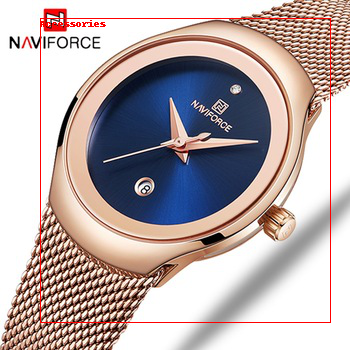

./image/HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg  | found category_desc:  Accessories 5  | found category_id:  5  | found region:  40,330,18,322
{'Auctions': [{'CategoryId': 5,
               'CustomContent': '{"name": '
                                '"HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg", '
                                '"path": '
                                '"./image/HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg"}',
               'PicName': 'HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg',
               'ProductId': 'HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg',
               'SortExprValues': '5.37633353624177e+24;0'},
              {'CategoryId': 5,
               'CustomContent': '{"name": '
                                '"HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg", '
                                '"path": '
                                '"./image/HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg"}',
               'PicName': 'HTB1c7BPXAL0gK0jSZFxq

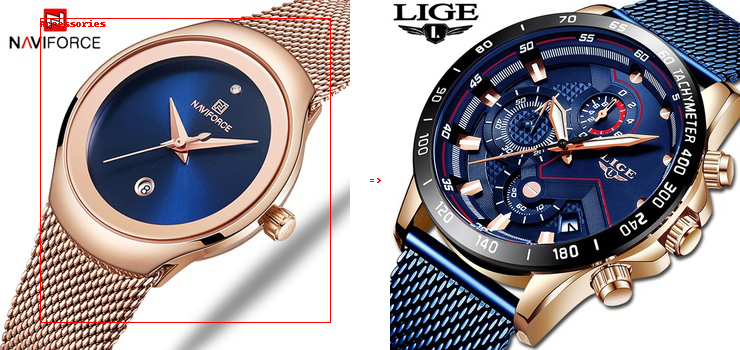

{'Auctions': [{'CategoryId': 5,
   'PicName': 'HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg',
   'SortExprValues': '5.37633353624177e+24;0',
   'CustomContent': '{"name": "HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg", "path": "./image/HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg"}',
   'ProductId': 'HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg'},
  {'CategoryId': 5,
   'PicName': 'HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg',
   'SortExprValues': '3.8739972114563;217',
   'CustomContent': '{"name": "HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg", "path": "./image/HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg"}',
   'ProductId': 'HTB1c7BPXAL0gK0jSZFxq6xWHVXac.jpg_350x350.jpg'},
  {'CategoryId': 5,
   'PicName': 'HTB1mPP7e.WF3KVjSZPhq6xclXXar.jpg_350x350.jpg',
   'SortExprValues': '3.83868432044983;223',
   'CustomContent': '{"name": "HTB1mPP7e.WF3KVjSZPhq6xclXXar.jpg_350x350.jpg", "path": "./image/HTB1mPP7e.WF3KVjSZPhq6xclXXar.jpg_350x350.jpg"}',
   'ProductId': 'HTB1mPP7e.WF3KVj

In [181]:
result = image_search_result_similarity(instanceName, './image/HTB1b5vTXXY7gK0jSZKzq6yikpXaI.jpg_350x350.jpg')
result

In [ ]:
# test to upload a list of image

import os
import time
from pprint import pprint


images = {}
for file in os.listdir(image_folder):
    if file.endswith(".jpg") or file.endswith(".png"):
        image_path = os.path.join(image_folder, file)
        # print(os.path.abspath(image_path))
        images[image_path] = file

pprint(images)

for image_path in images:
    image_name = images[image_path]
    result = image_upload(instanceName, image_name, image_name, image_path)
    print(instanceName,  image_name, image_path, result)
    time.sleep(1)

In [11]:
request = DeleteImageRequest.DeleteImageRequest()
request.set_endpoint(endpoint)
request.set_InstanceName(instanceName)
request.set_ProductId("1")
response = client.do_action_with_exception(request)
print(response)

b'{"Message":"success","RequestId":"5B9D4570-96ED-4F0D-A2F6-14BB33E59551","Success":true,"Code":0}'
